In [32]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Importing Dataframe

In [33]:
path=r'C:\Users\solom\Desktop\Achievement-6 Solomon'

In [34]:
df= pd.read_csv(os.path.join(path, 'Manipulated Data', 'Adidas_sales_clean.csv'), index_col = False)

In [35]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,0,Foot Locker,1185732,1/1/2020,2020,January,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,1,Foot Locker,1185732,1/2/2020,2020,January,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,2,Foot Locker,1185732,1/3/2020,2020,January,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,3,Foot Locker,1185732,1/4/2020,2020,January,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,4,Foot Locker,1185732,1/5/2020,2020,January,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


## Remove unnecessary columns

In [36]:
#creating a subset dataeset
df_sub=df.drop(columns=['Unnamed: 0','Retailer ID','Month','Year'])

In [37]:
df_sub.columns

Index(['Retailer', 'Invoice Date', 'Day', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Profit', 'Margin ratio',
       'Sales Method'],
      dtype='object')

In [38]:
df_sub.head()

,Retailer,Invoice Date,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,Foot Locker,1/1/2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1/2/2020,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1/3/2020,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1/4/2020,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1/5/2020,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [39]:
df_sub.describe()

,Day,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,14.696310,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,7.348019,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.100000
25%,9.000000,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,15.000000,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,21.000000,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,31.000000,110.000000,1275.000000,825000.000000,390000.000000,0.800000


## Correlation matrix heatmap

In [40]:
df_sub.dtypes

Retailer           object
Invoice Date       object
Day                 int64
Region             object
State              object
City               object
Product            object
Price per Unit      int64
Units Sold          int64
Total Sales         int64
Profit            float64
Margin ratio      float64
Sales Method       object
dtype: object

In [41]:
df_sub.corr(numeric_only=True)

,Day,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio
Day,1.000000,0.076662,-0.038148,-0.017467,-0.024119,-0.021184
Price per Unit,0.076662,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.038148,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.017467,0.435811,0.913431,1.000000,0.956307,-0.364592
Profit,-0.024119,0.394546,0.892379,0.956307,1.000000,-0.211920
Margin ratio,-0.021184,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


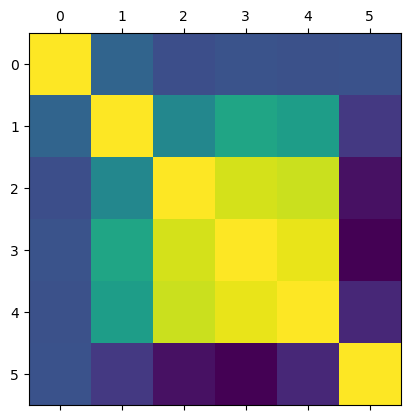

In [42]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr(numeric_only=True))
plt.show()

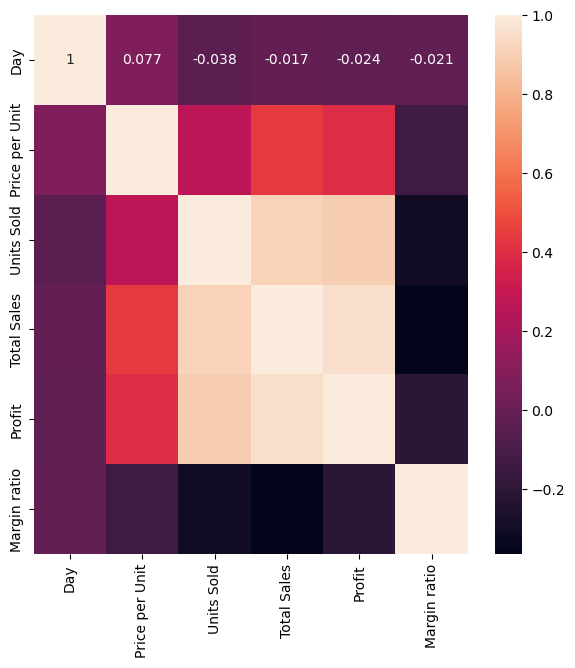

In [43]:
# Creating subplot using matplotlib
a,ax = plt.subplots(figsize=(7,7))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_sub.corr(numeric_only=True), annot = True, ax = ax)

### From the correlation heatmap there is strong mutual correlation between Profit, Total sales and Units sold which makes sense

## Scatterplot

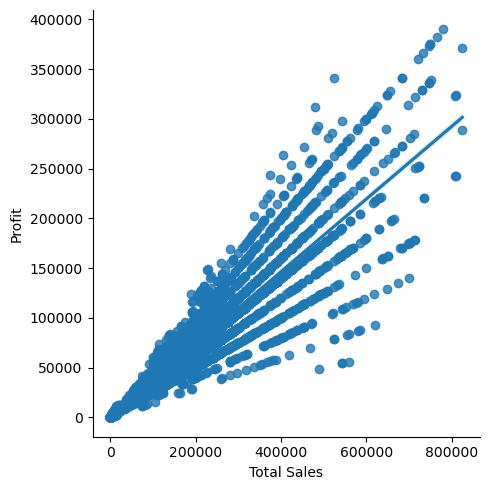

In [44]:
sns.lmplot(x = 'Total Sales', y = 'Profit', data = df_sub)

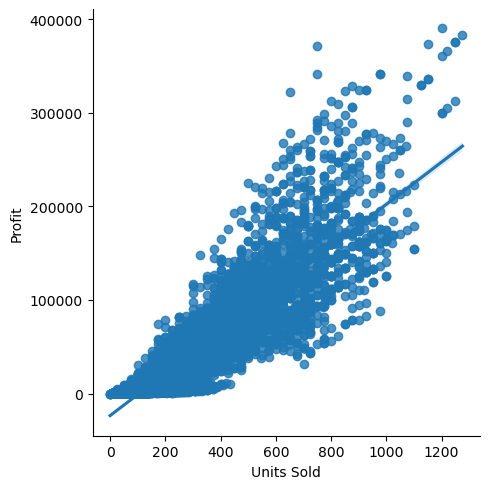

In [45]:
sns.lmplot(x = 'Units Sold', y = 'Profit', data = df_sub)

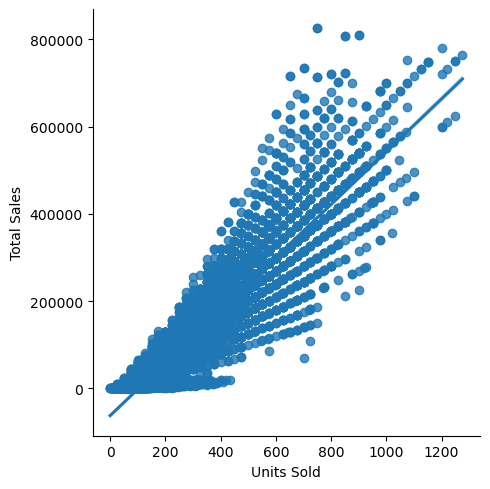

In [46]:
sns.lmplot(x = 'Units Sold', y = 'Total Sales', data = df_sub)

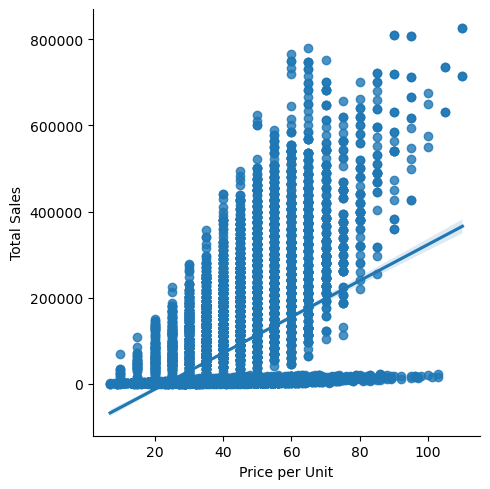

In [47]:
sns.lmplot(x = 'Price per Unit', y = 'Total Sales', data = df_sub)

### As you can see from the scatterplot Total sales, Profit and Units sold has a positive strong correlation. The price per unit and total sales have a moderate-strong positive relationship

## Creating a pair plot

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

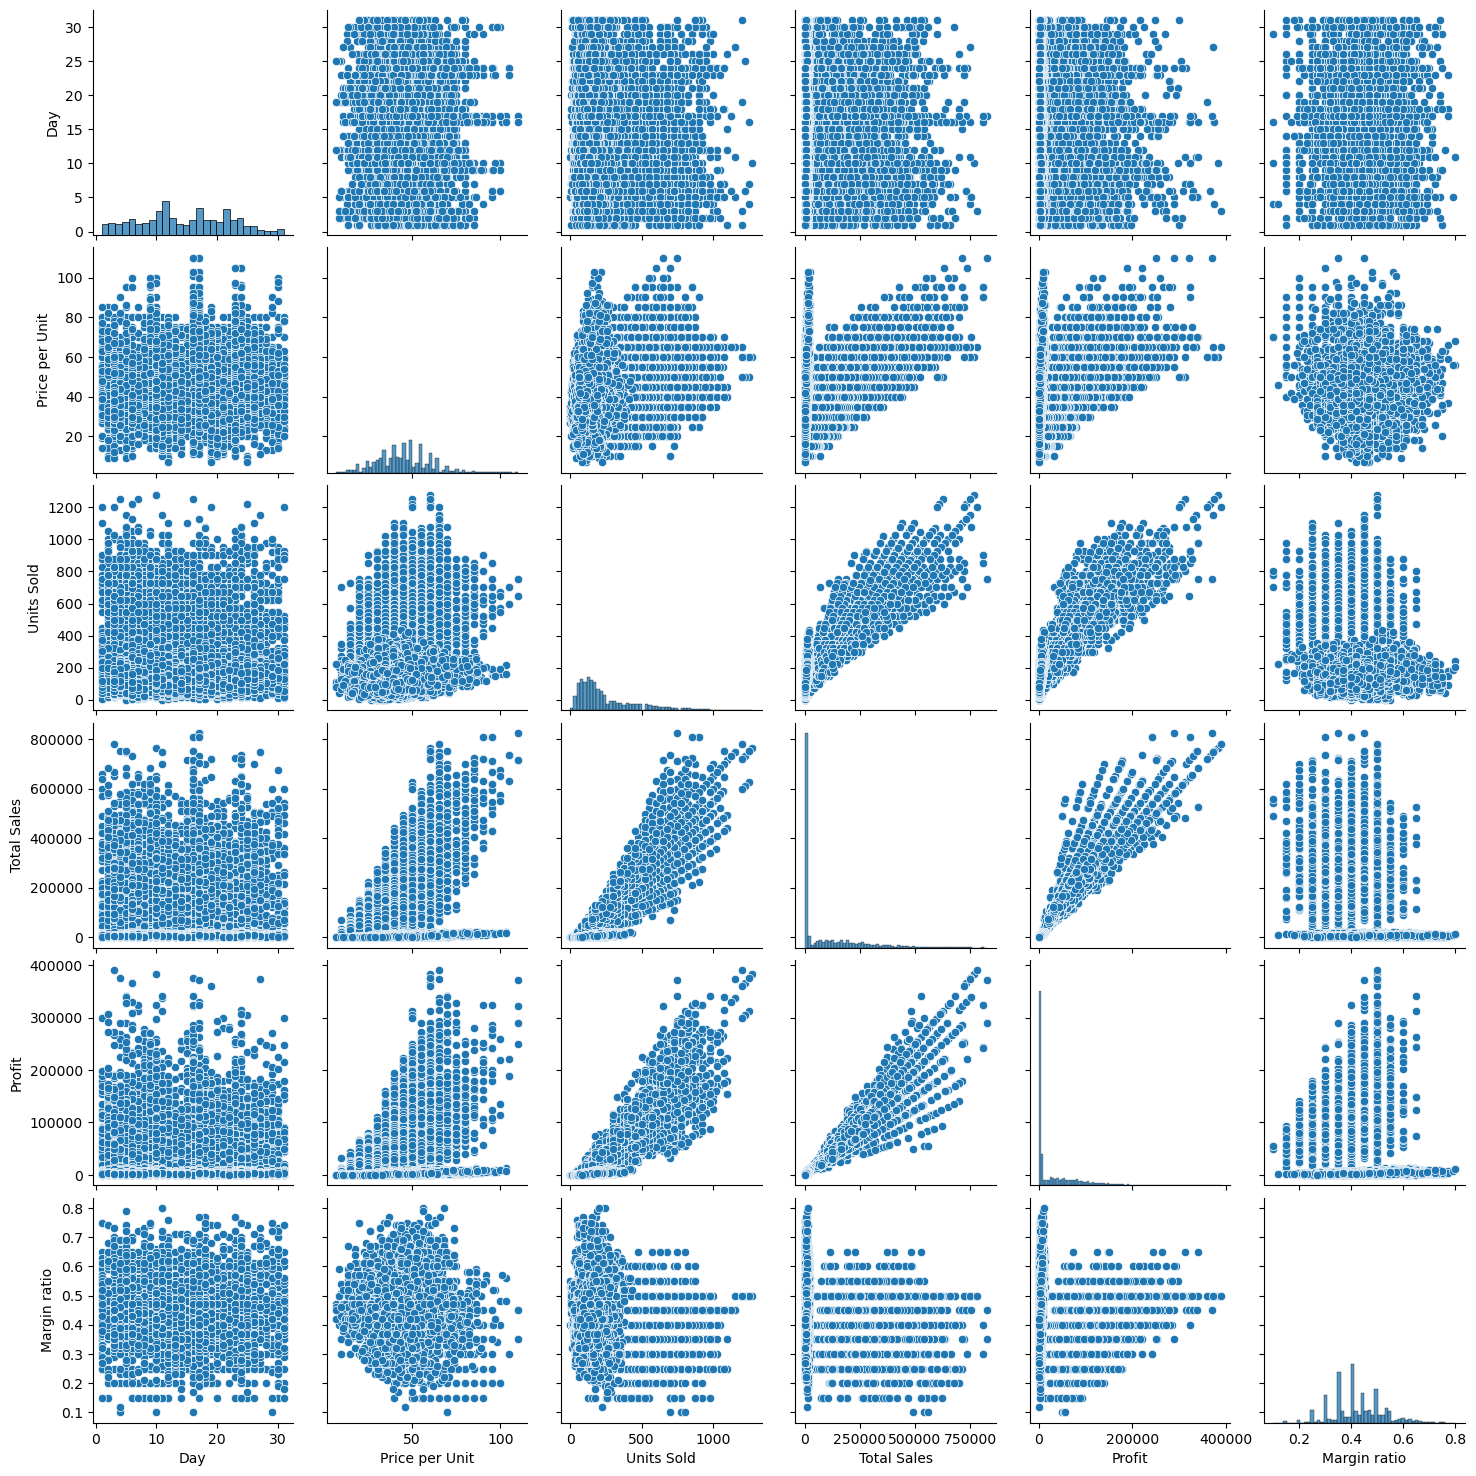

In [48]:
# Creating a pairplot
pair_plot = sns.pairplot(df_sub)

## Categorical plot

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price per Unit', ylabel='Count'>

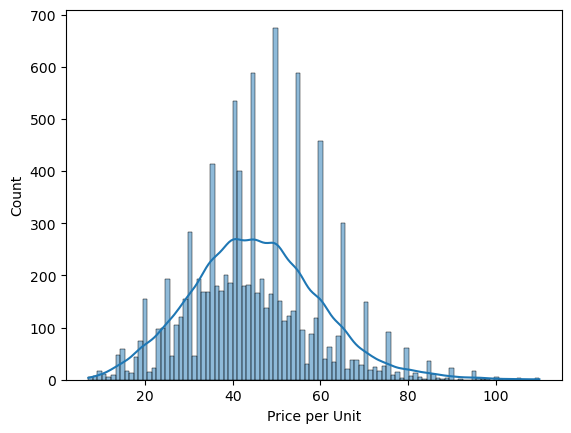

In [49]:
# Creating a histogram to see distribution
sns.histplot(df_sub['Price per Unit'], bins = 100, kde = True)

In [50]:
df_sub.loc[df_sub['Price per Unit'] < 30, 'Price Category'] = 'Low Price'

In [51]:
df_sub.loc[(df_sub['Price per Unit'] >= 30) & (df_sub['Price per Unit'] < 60), 'Price Category'] = 'Medium Price'

In [52]:
df_sub.loc[df_sub['Price per Unit'] >= 60, 'Price Category'] = 'High Price'

In [53]:
df_sub['Price Category'].value_counts(dropna = False)

Price Category
Medium Price    6672
High Price      1661
Low Price       1315
Name: count, dtype: int64

In [54]:
df_sub.columns

Index(['Retailer', 'Invoice Date', 'Day', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Profit', 'Margin ratio',
       'Sales Method', 'Price Category'],
      dtype='object')

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


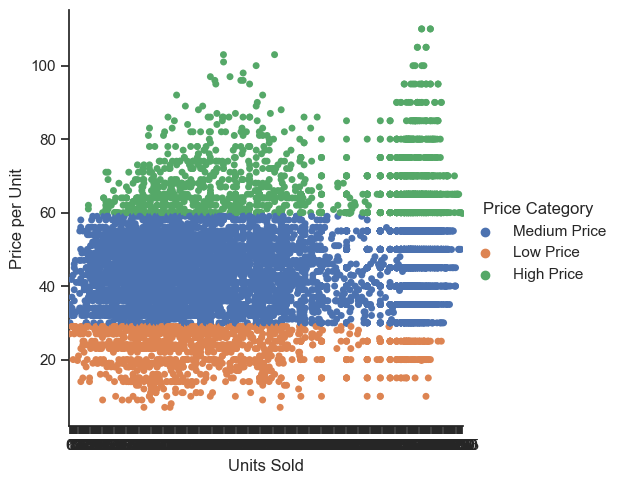

In [55]:
# Create a categorical plot in seaborn using the Price categories created above

sns.set(style="ticks")
fig = sns.catplot(x="Units Sold", y="Price per Unit", hue="Price Category", data=df_sub)

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


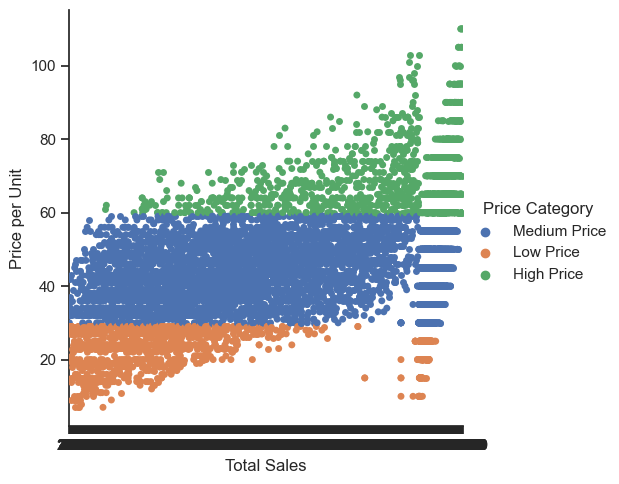

In [56]:
sns.set(style="ticks")
fig = sns.catplot(x="Total Sales", y="Price per Unit", hue="Price Category", data=df_sub)

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


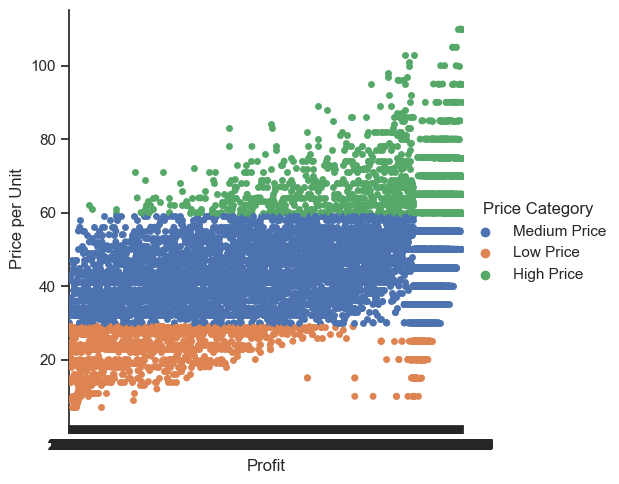

In [57]:
sns.set(style="ticks")
fig = sns.catplot(x="Profit", y="Price per Unit", hue="Price Category", data=df_sub)